# GRIP : The Sparks Foundation

## Name : PAULAMI SANYAL

### Data Science and Business Analytics Intern August 2021 Batch

### Task -1 : Prediction Using Supervised ML


#### Prediction of Percentage of a student based on the number of study hours

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#reading data
dataset = pd.read_csv("http://bit.ly/w-data", sep = ',')

### Performing EDA

In [3]:
print(dataset.shape)

(25, 2)


In [4]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Performing Data Visualization 

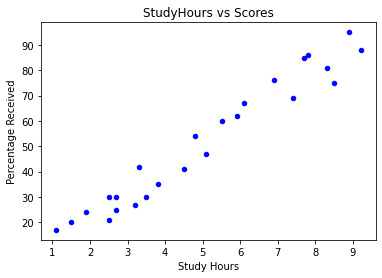

In [7]:
dataset.plot(kind = 'scatter', x = 'Hours', y = 'Scores', color = 'b')
plt.title('StudyHours vs Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Received')
plt.show()

<AxesSubplot:>

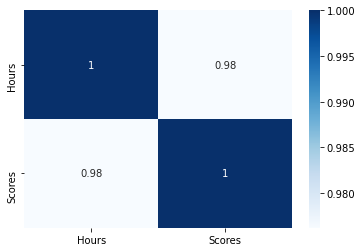

In [8]:
#finding the correlation between data
plt.figure(figsize=(6,4))
sns.heatmap(dataset.corr(),cmap='Blues',annot=True) 

<AxesSubplot:>

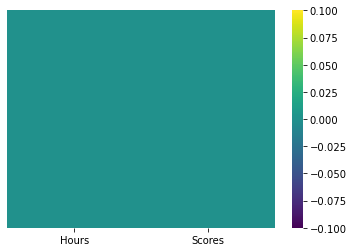

In [9]:
#Checking for any missing values
sns.heatmap(dataset.isnull(),cbar=True,yticklabels=False,cmap = 'viridis')

In [10]:
#Distribution of variables
Hours = dataset['Hours']
Scores = dataset['Scores']

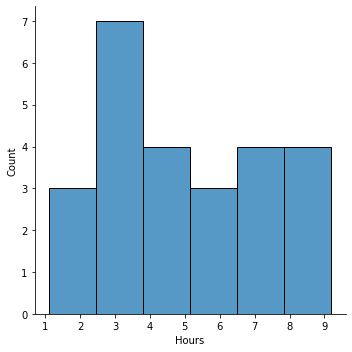

In [11]:
sns.displot(Hours)

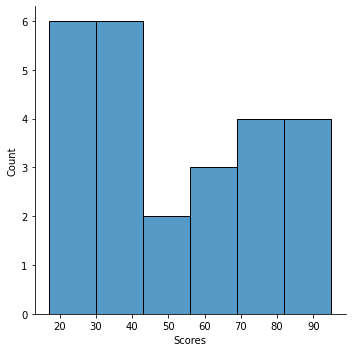

In [12]:
sns.displot(Scores)

### Linear Regression

In [13]:
#slicing the dataset into dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
#training the algorithm
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [16]:
print("Training is complete")

Training is complete


In [17]:
#Calculating intercept and coefficient
print("The intercept is:",reg.intercept_)
print("The coefficient is:",reg.coef_)

The intercept is: 2.794196676599803
The coefficient is: [9.71054094]


In [18]:
y_pred = reg.predict(X_test)
y_pred

array([83.39168645, 27.07054902, 27.07054902, 69.79692914, 60.0863882 ,
       29.0126572 , 34.83898177, 52.31795545])

### Plotting Regression Line

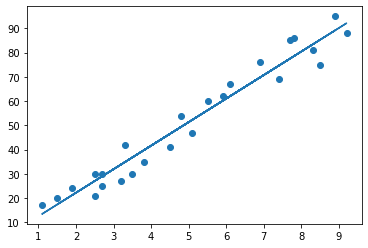

In [19]:
m = reg.coef_
c = reg.intercept_
line = m*X + c
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [20]:
#Creating an array containing all the predicted values
y_pred = reg.predict(X_test)
y_pred 

array([83.39168645, 27.07054902, 27.07054902, 69.79692914, 60.0863882 ,
       29.0126572 , 34.83898177, 52.31795545])

In [21]:
#Comparing Actual vs Predicted values
actual_vs_predicted = pd.DataFrame({'Target':y_test, 'Predicted':y_pred})
actual_vs_predicted

,Target,Predicted
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


#  Q: What will be predicted score if a student studies for 9.25 hrs/ day?

In [23]:
h=9.25
s=reg.predict([[h]])
print('If a student studies for {} hours per day, he/she will score {}% in exaam'.format(h,s))

If a student studies for 9.25 hours per day, he/she will score [92.61670034]% in exaam


### Model Evaluation

In [26]:
#Calculating root mean squared error to evaluate model performance
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('MAE :', metrics.mean_absolute_error(y_test,y_pred))
print('R2 Score:', metrics.r2_score(y_test,y_pred))

MSE: 23.61945761415174
RMSE :  4.859985351228103
MAE : 4.499999999999998
R2 Score: 0.9487647340257012
